In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [11]:
# Loading datasets
customers  = pd.read_csv('Dataset\\Customers.csv')
products  = pd.read_csv('Dataset\\Products.csv')
transactions  = pd.read_csv('Dataset\\Transactions.csv')

In [12]:
customers.head(), products.head(), transactions.head()

(  CustomerID        CustomerName         Region  SignupDate
 0      C0001    Lawrence Carroll  South America  2022-07-10
 1      C0002      Elizabeth Lutz           Asia  2022-02-13
 2      C0003      Michael Rivera  South America  2024-03-07
 3      C0004  Kathleen Rodriguez  South America  2022-10-09
 4      C0005         Laura Weber           Asia  2022-08-15,
   ProductID              ProductName     Category   Price
 0      P001     ActiveWear Biography        Books  169.30
 1      P002    ActiveWear Smartwatch  Electronics  346.30
 2      P003  ComfortLiving Biography        Books   44.12
 3      P004            BookWorld Rug   Home Decor   95.69
 4      P005          TechPro T-Shirt     Clothing  429.31,
   TransactionID CustomerID ProductID      TransactionDate  Quantity  \
 0        T00001      C0199      P067  2024-08-25 12:38:23         1   
 1        T00112      C0146      P067  2024-05-27 22:23:54         1   
 2        T00166      C0127      P067  2024-04-25 07:38:55    

In [13]:
# Merginig dataset
transactions_customers_info = pd.merge(transactions, customers, on="CustomerID", how="inner")
final_dataset = pd.merge(transactions_customers_info, products, on="ProductID", how="inner")

In [14]:
final_dataset.columns.array

<NumpyExtensionArray>
[  'TransactionID',      'CustomerID',       'ProductID', 'TransactionDate',
        'Quantity',      'TotalValue',         'Price_x',    'CustomerName',
          'Region',      'SignupDate',     'ProductName',        'Category',
         'Price_y']
Length: 13, dtype: object

In [15]:
# Converts the date columns to datetime format and adding new features from dates
final_dataset["SignupDate"] = pd.to_datetime(final_dataset["SignupDate"])
final_dataset["TransactionDate"] = pd.to_datetime(final_dataset["TransactionDate"])

final_dataset["SignupYear"] = final_dataset["SignupDate"].dt.year
final_dataset["TransactionMonth"] = final_dataset["TransactionDate"].dt.month
final_dataset["TransactionYear"] = final_dataset["TransactionDate"].dt.year


In [16]:
final_dataset.columns.array

<NumpyExtensionArray>
[   'TransactionID',       'CustomerID',        'ProductID',
  'TransactionDate',         'Quantity',       'TotalValue',
          'Price_x',     'CustomerName',           'Region',
       'SignupDate',      'ProductName',         'Category',
          'Price_y',       'SignupYear', 'TransactionMonth',
  'TransactionYear']
Length: 16, dtype: object

In [17]:
# Drop duplicate rows 
final_dataset.drop_duplicates()


,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y,SignupYear,TransactionMonth,TransactionYear
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68,2022,8,2024
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68,2024,5,2024
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68,2024,4,2024
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68,2024,3,2024
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68,2022,3,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86,Jacob Holt,South America,2022-01-22,SoundWave Smartwatch,Electronics,459.86,2022,10,2024
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86,Mrs. Kimberly Wright,North America,2024-04-07,SoundWave Smartwatch,Electronics,459.86,2024,6,2024
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86,Tyler Haynes,North America,2024-09-21,SoundWave Smartwatch,Electronics,459.86,2024,4,2024
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86,Joshua Hamilton,Asia,2024-11-11,SoundWave Smartwatch,Electronics,459.86,2024,9,2024


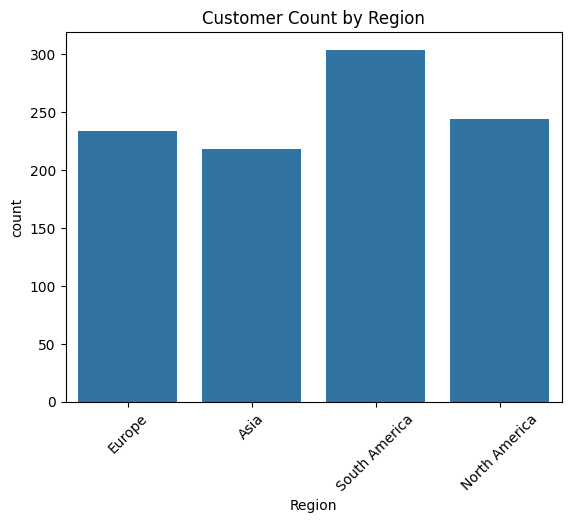

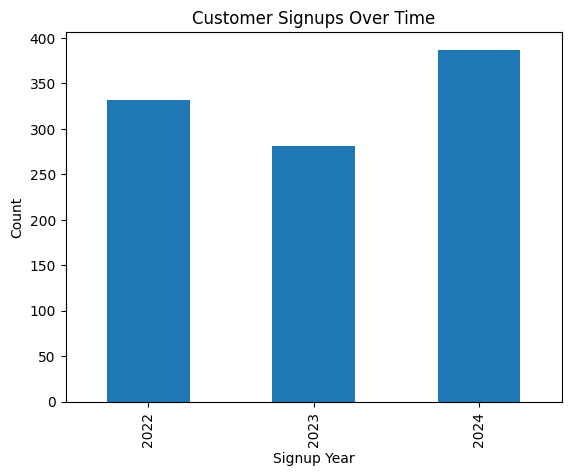

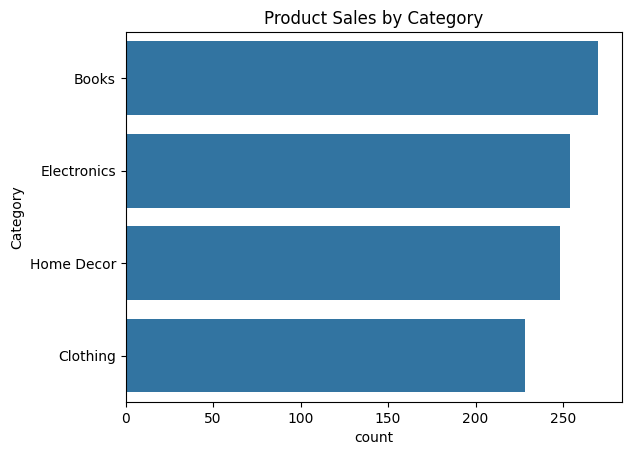

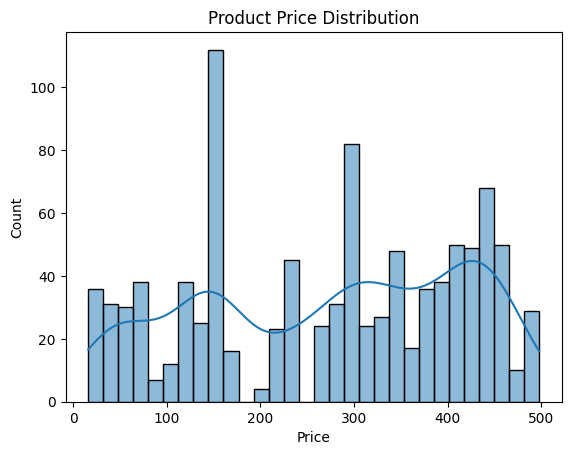

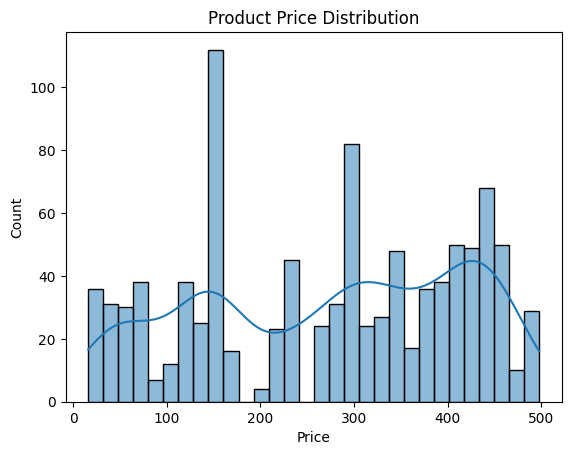

In [18]:
# Plot distribution of Regions
sns.countplot(data=final_dataset, x="Region")
plt.title("Customer Count by Region")
plt.xticks(rotation=45)
plt.show()

# Plot Signup Trends
final_dataset["SignupYear"].value_counts().sort_index().plot(kind="bar")
plt.title("Customer Signups Over Time")
plt.xlabel("Signup Year")
plt.ylabel("Count")
plt.show()

# Product Category distribution
sns.countplot(data=final_dataset, y="Category", order=final_dataset["Category"].value_counts().index)
plt.title("Product Sales by Category")
plt.show()

# Price distribution
sns.histplot(final_dataset["Price_x"], kde=True, bins=30)
plt.title("Product Price Distribution")
plt.xlabel("Price")
plt.show()

sns.histplot(final_dataset["Price_x"], kde=True, bins=30)
plt.title("Product Price Distribution")
plt.xlabel("Price")
plt.show()
    

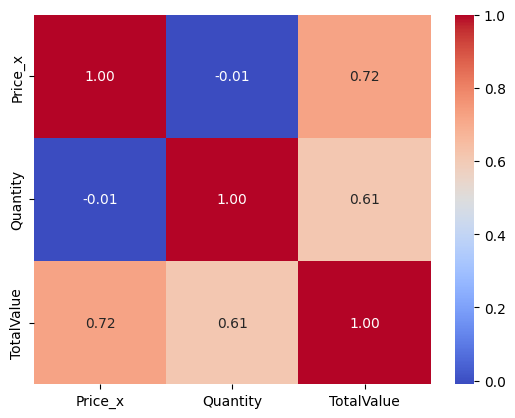

In [19]:
# Correlation
correlation_matrix = final_dataset[["Price_x", "Quantity", "TotalValue"]].corr()

# Heatmap plot
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

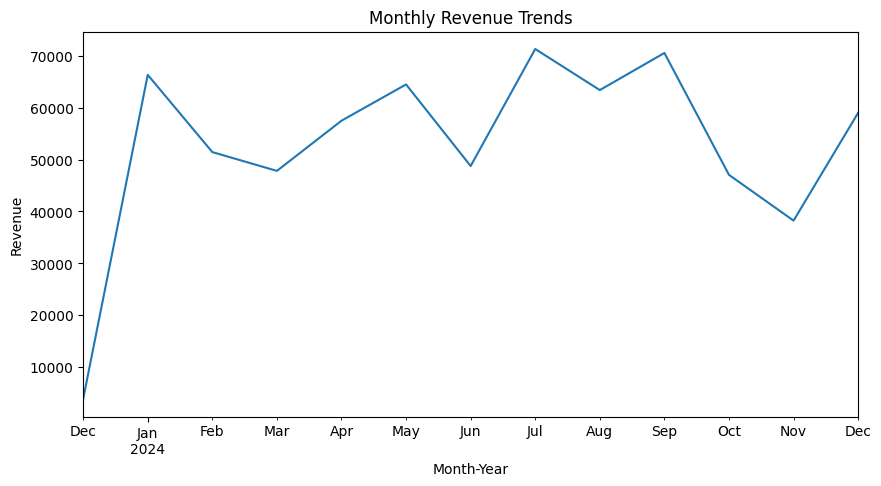

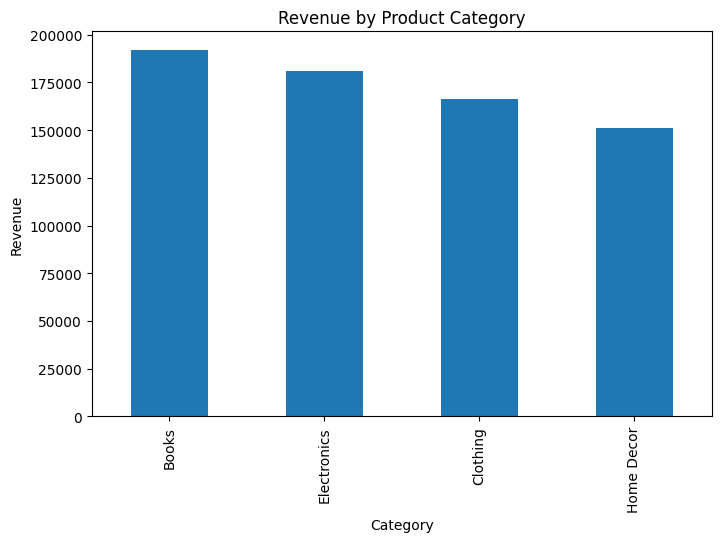

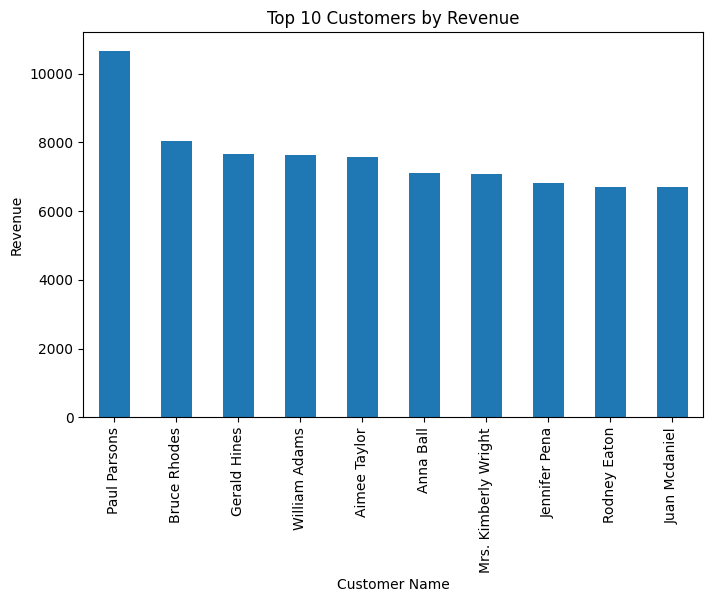

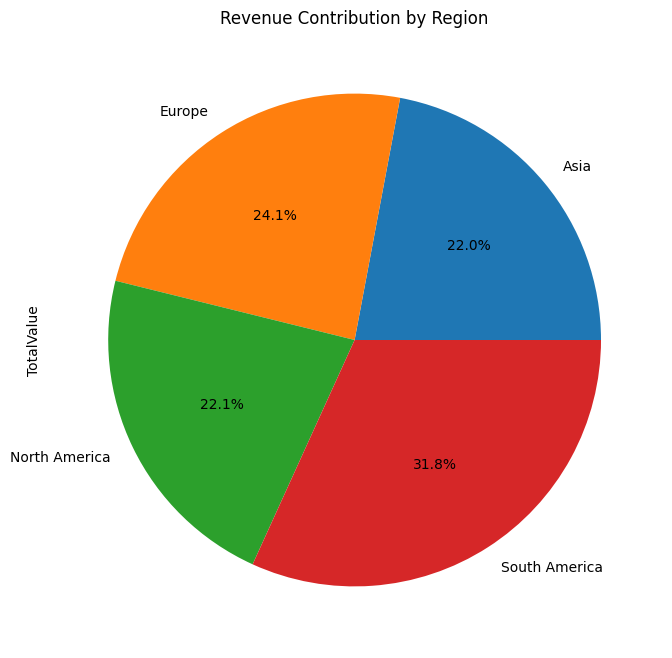

In [20]:


data=final_dataset

data["TransactionMonthYear"] = data["TransactionDate"].dt.to_period("M")
monthly_revenue = data.groupby("TransactionMonthYear")["TotalValue"].sum()
monthly_revenue.plot(kind="line", figsize=(10, 5))
plt.title("Monthly Revenue Trends")
plt.xlabel("Month-Year")
plt.ylabel("Revenue")
plt.show()

# Revenue by Product Category
category_revenue = data.groupby("Category")["TotalValue"].sum().sort_values(ascending=False)
category_revenue.plot(kind="bar", figsize=(8, 5))
plt.title("Revenue by Product Category")
plt.xlabel("Category")
plt.ylabel("Revenue")
plt.show()

# Top 10 Customers by Revenue
top_customers = data.groupby("CustomerName")["TotalValue"].sum().sort_values(ascending=False).head(10)
top_customers.plot(kind="bar", figsize=(8, 5))
plt.title("Top 10 Customers by Revenue")
plt.xlabel("Customer Name")
plt.ylabel("Revenue")
plt.show()

# Region-wise Revenue Contribution
region_revenue = data.groupby("Region")["TotalValue"].sum()
region_revenue.plot(kind="pie", autopct="%1.1f%%", figsize=(8, 8))
plt.title("Revenue Contribution by Region")
plt.show()
